In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [95]:
titanic=pd.read_csv("C:/Users/dghos/Downloads/titanic - titanic.csv")

In [96]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [97]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [98]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [100]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [101]:
titanic[titanic.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [102]:
titanic.drop_duplicates(inplace=True)
titanic.reset_index(drop=True, inplace=True)
titanic.shape

(891, 12)

# Outliers

<Axes: >

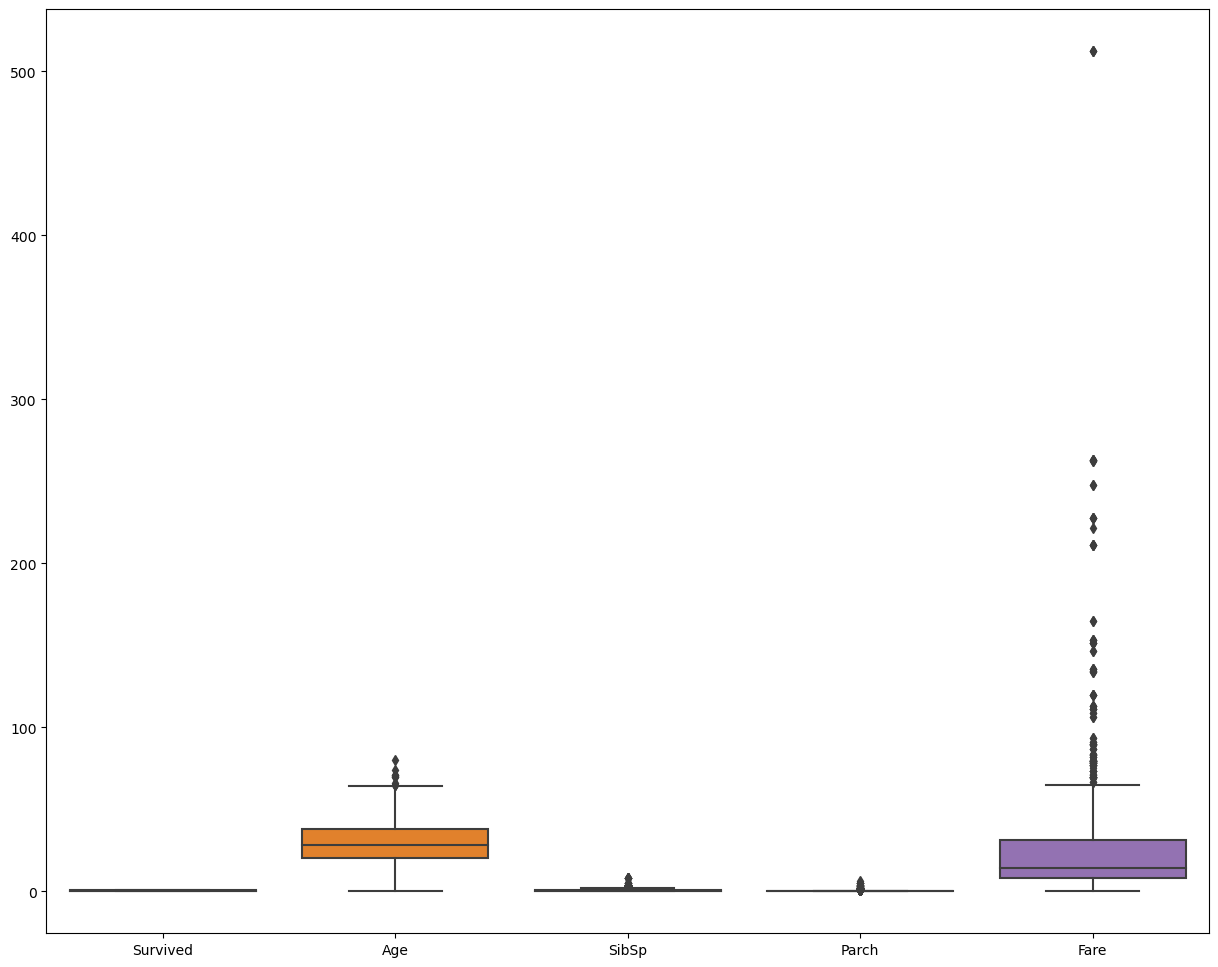

In [103]:
plt.figure(figsize=(15,12)) # Set the Width & Height
sns.boxplot(data=titanic[['Survived','Age','SibSp','Parch','Fare']])

In [104]:
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1
    
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    
    #print("The lower & Upper Bound",lwr_bound, upr_bound)
    
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list 



for i in ['Survived','Pclass','Age','SibSp','Fare']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in Survived attribute : []
Outliers in Pclass attribute : []
Outliers in Age attribute : []
Outliers in SibSp attribute : []
Outliers in Fare attribute : [66.6, 66.6, 69.3, 69.3, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 69.55, 71.0, 71.0, 71.2833, 73.5, 73.5, 73.5, 73.5, 73.5, 75.25, 76.2917, 76.7292, 76.7292, 76.7292, 77.2875, 77.2875, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.9583, 77.

In [105]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1
    
    
for i in ['Survived','Pclass','Age','SibSp','Fare']:
    titanic[i]=handle_outliers(titanic[i])

<Axes: >

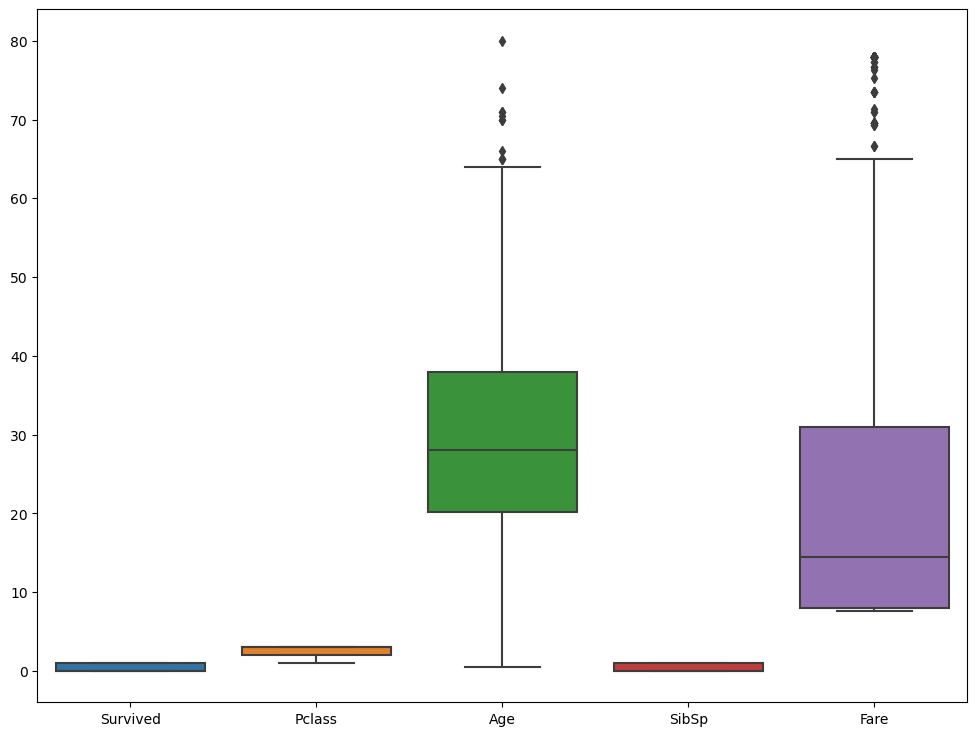

In [106]:
plt.figure(figsize=(12,9))
sns.boxplot(data=titanic[['Survived','Pclass','Age','SibSp','Fare']])

# Encoding


In [107]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [108]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

# Univariate Analysis

In [109]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.55,NaN,S


<Axes: xlabel='Embarked', ylabel='count'>

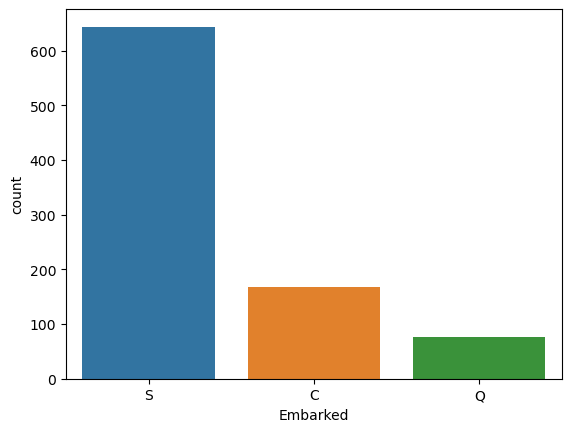

In [110]:
sns.countplot(data= titanic, x=titanic.Embarked)
#df['Survived'].value_counts().plot(kind='bar')

### More people boarded from the South-hamptom

<Axes: xlabel='Pclass', ylabel='Age'>

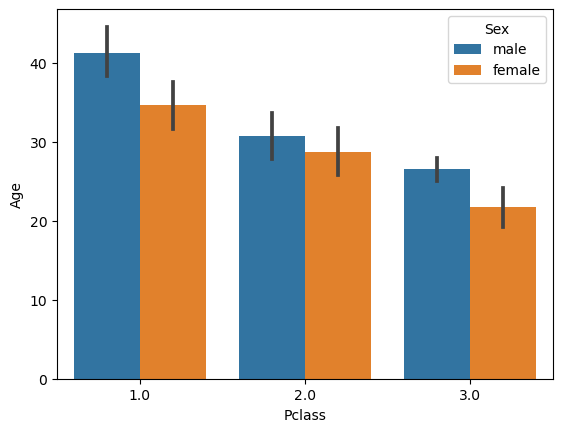

In [111]:
sns.barplot(x=titanic['Pclass'],y=titanic['Age'],hue=titanic['Sex'])

## People booked tickets of 1st class more.
## Maybe it is due to the fact that the price difference between the 2nd class and the 1st class is not more.

<Axes: xlabel='Sex', ylabel='Age'>

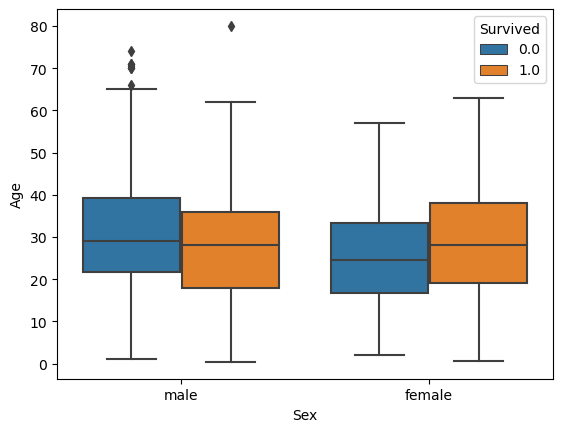

In [112]:
sns.boxplot(x=titanic['Sex'],y=titanic['Age'],hue=titanic['Survived'])

## Females survived more than the Males. 
## Also the median of the age of the people who survived is near around 25-30

<Axes: ylabel='Sex'>

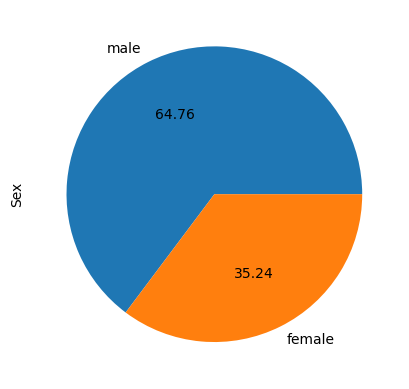

In [113]:
titanic['Sex'].value_counts().plot(kind='pie',autopct='%.2f')

## There were more Males who boarded the ship

out of 891 65 % are male


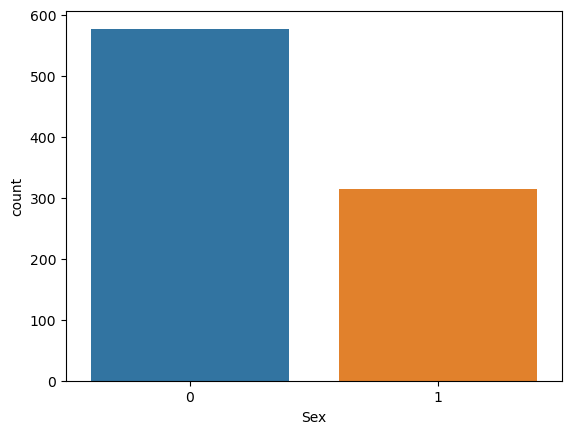

In [22]:
sns.countplot(x= titanic['Sex'])

gender = round (titanic['Sex'].value_counts().values[0]/891*100)

# Observation
print('out of 891 {} % are male'.format(gender))

out of 891 62 % survived


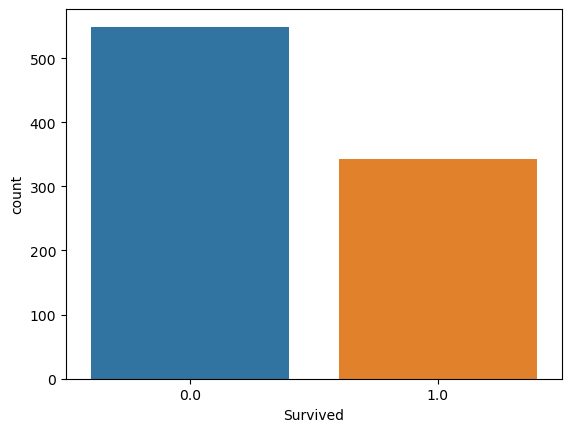

In [23]:
sns.countplot(x= df['Survived'])

survive = round (df['Survived'].value_counts().values[0]/891*100)

# Observation
print('out of 891 {} % survived'.format(survive))

(array([100., 346., 188.,  69.,  11.]),
 array([ 0.42 , 16.336, 32.252, 48.168, 64.084, 80.   ]),
 <BarContainer object of 5 artists>)

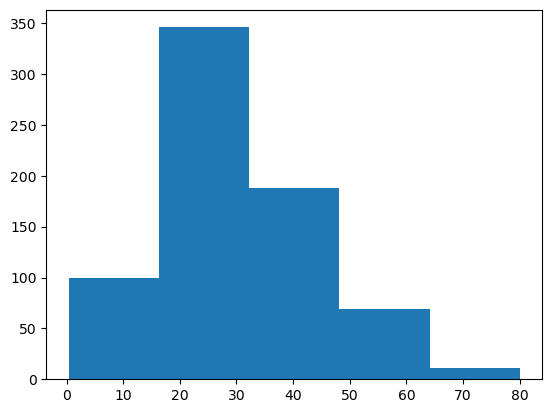

In [114]:
plt.hist(titanic['Age'],bins=5)

## People who boarded were more in the age range- 20-30

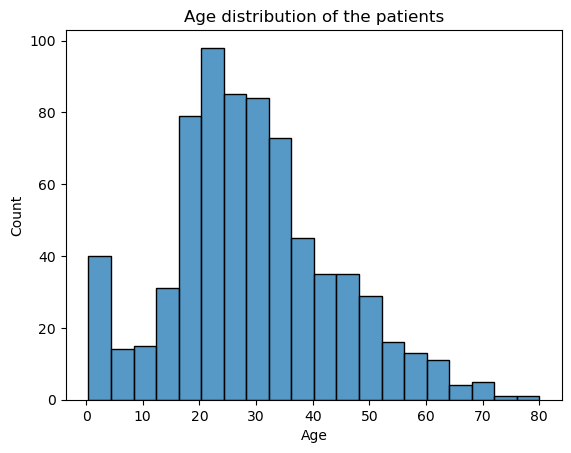

In [115]:
sns.histplot(df.Age) 
plt.title('Age distribution of the patients')
plt.show()

# Bivariate & Multivariate analysis

##  ClusterMap (Categorical - Categorical)

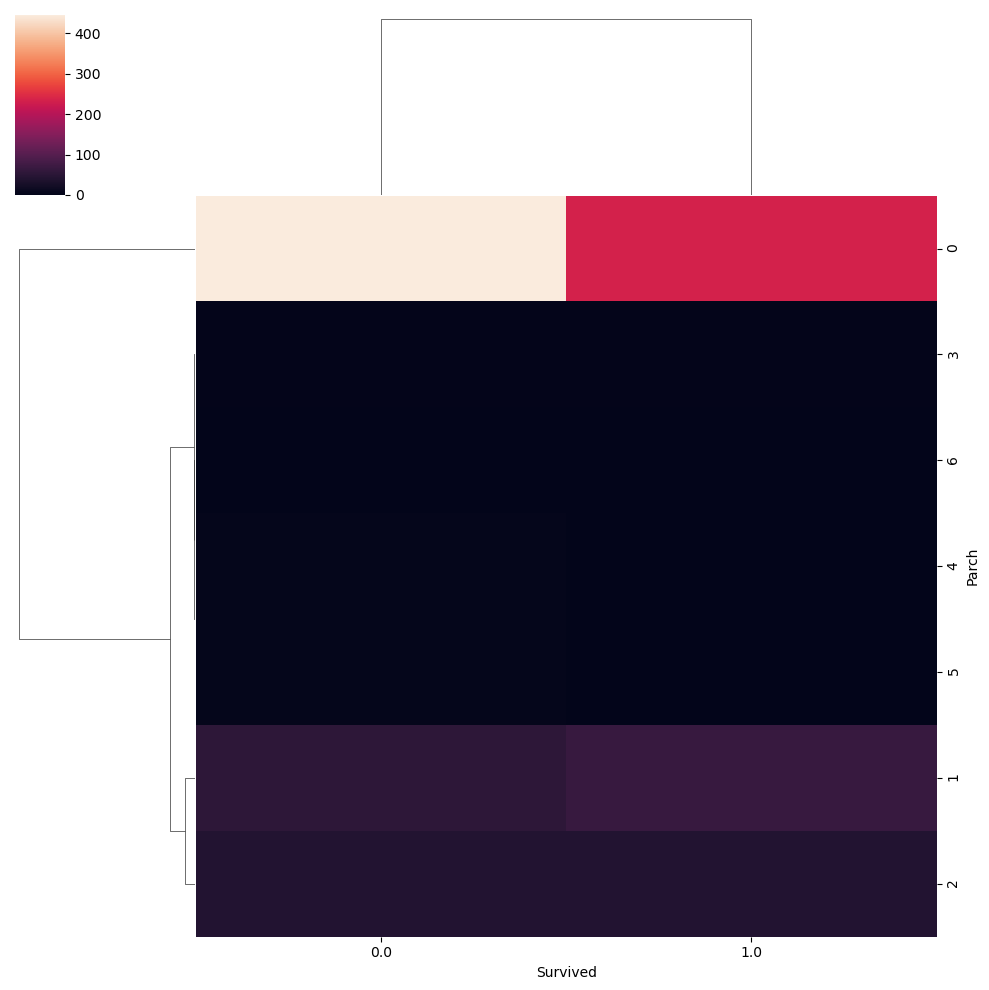

In [116]:
sns.clustermap(pd.crosstab(titanic['Parch'],titanic['Survived']))

<Axes: xlabel='Sex', ylabel='Survived'>

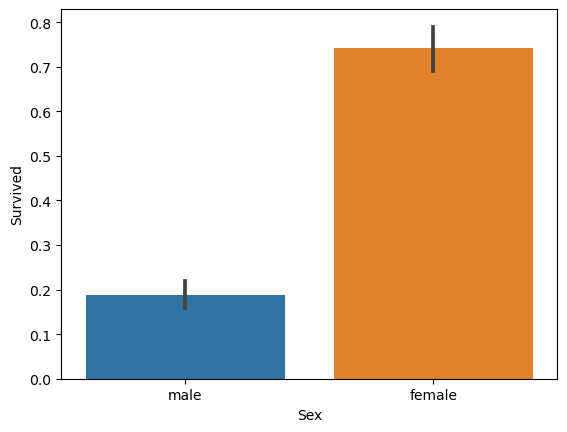

In [117]:
sns.barplot(x='Sex',y='Survived',data=titanic)

## Females survival was the most important thing at that point

Text(0.5, 1.0, 'Correlation map')

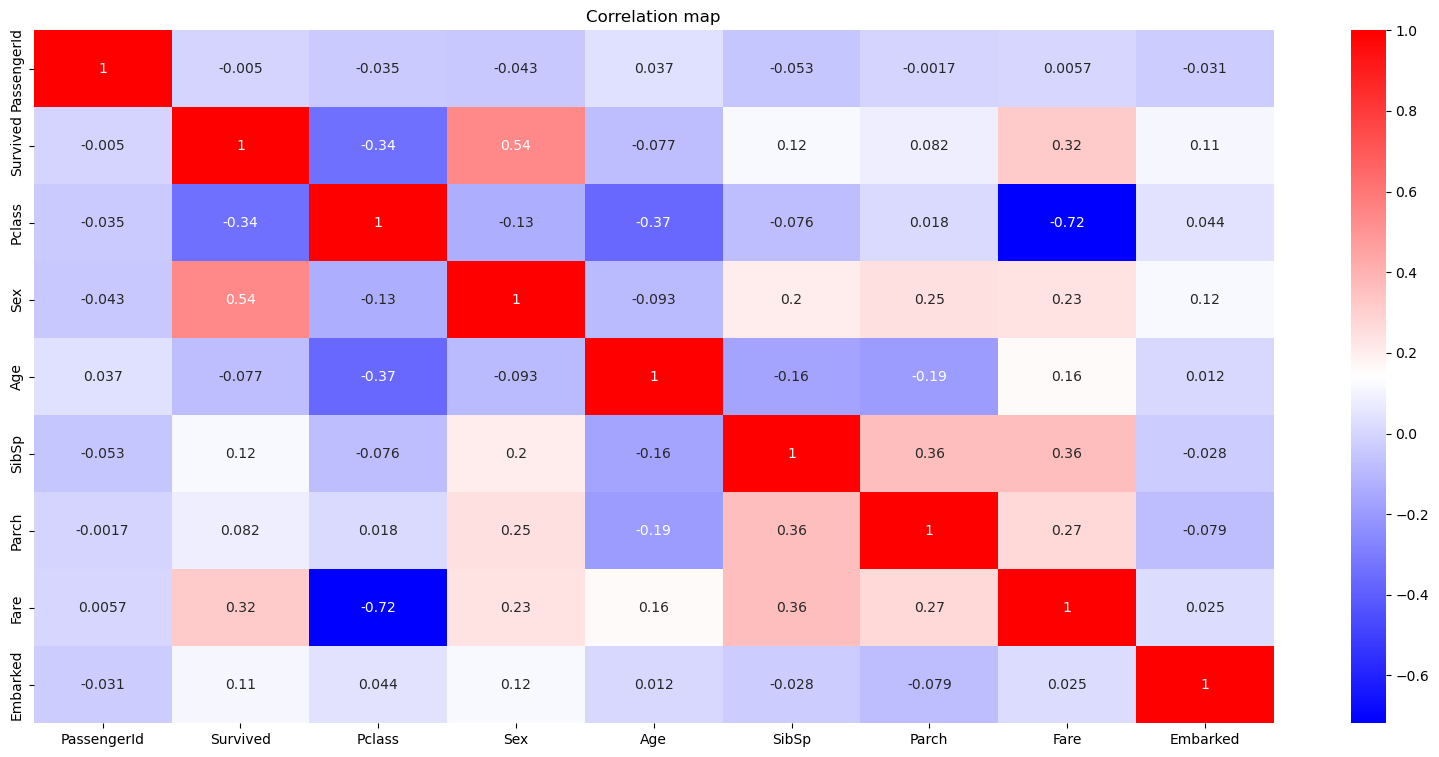

In [28]:
plt.figure(figsize=(20,9));
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

In [132]:
titanic.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,-0.789272,0.827377,"Braund, Mr. Owen Harris",male,-0.530377,1.465746,0,A/5 21171,-0.774448,NaN,S


In [131]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Split the dataset in the ratio of 80:20

In [125]:
from sklearn.model_selection import train_test_split # Import train_test_split function

In [126]:
feature_cols = ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
X = titanic[feature_cols] # Features
y = titanic.Sex # Target variable

In [127]:
y

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

In [129]:
X_train.shape

(712, 11)

In [130]:
 X_test.shape

(179, 11)